I chose SZA's CTRL and Ariana Grande's Positions. They are two of my favorite albums because of how relaxing many of the songs are. I chose them because they are more recent albums in similar genres, but I think it would be intersting to look at their differences.

In [38]:
import pandas as pd
import json
import base64
import requests
from matplotlib import pyplot as plt
import numpy as np

In [39]:
keys = pd.read_csv("Spotify_Keys.txt", header = 0, sep = ",")
appid = keys['Client_ID'][0]
appsecret = keys['Client_Secret'][0]
client_cred = base64.b64encode(str(appid + ":" + appsecret).encode('ascii'))
header = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}
payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"
response = requests.post(access_token_url, headers = header, data = payload)
session_token = response.json()['access_token']
session_header = {'Authorization': 'Bearer {}'.format(response.json()['access_token'])}

In [40]:
ctrl_id = "6FKP2O0oOvZlDkF0gyTjiJ"

In [41]:
ctrl_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(ctrl_id)
ctrl_tracks = requests.get(ctrl_tracks_endpoint, headers = session_header)

In [42]:
ctrl_dict = json.loads(ctrl_tracks.text)
ctrl_track_ids = [x['id'] for x in ctrl_dict['items']]
ctrl_track_ids

['3lw0PaZdGkvCwTaiatHbnU',
 '7HhtNlYNI32WY6n0ISX0U1',
 '0JijvZALkvx7uonQdvXXpH',
 '5L7sgpCZgrcqpgh1xM7r6V',
 '5MffAkbuTPBqRdPuPzaEb5',
 '61fROeJfnI3OtNQYMpN1gT',
 '4U4bI86Jynl9et1eXyEpz6',
 '6yyxqE2ZdAVuD2qEL76POx',
 '5dIkvSrG129dvaQ3xb0M9R',
 '4rbl561Pds0a8d9h0RLaLF',
 '0YPPnLR3TS4ZIAKCQOLZhK',
 '1Y7tMWKvFZLCpoX0SINyhP',
 '4icqsSm2gIMEMUAcaReA3u',
 '0WC7CIZHwPXoFQEbJ721vT',
 '3fcX3E9l1gVnfKeWaEzHHv',
 '3vZGtceCbJVh5aDT4XhE0p',
 '4pHy0gmjfpD0Fgond5c4Ta',
 '4UJuFZ4btsiGqMyFHBRPbo',
 '7newfXclX39UwWTw2gDswM',
 '2xZ0zfuDTv5LxLhEgD82PG']

In [43]:
ctrl_track_strings = ','.join(str(x) for x in ctrl_track_ids)
ctrl_track_strings

'3lw0PaZdGkvCwTaiatHbnU,7HhtNlYNI32WY6n0ISX0U1,0JijvZALkvx7uonQdvXXpH,5L7sgpCZgrcqpgh1xM7r6V,5MffAkbuTPBqRdPuPzaEb5,61fROeJfnI3OtNQYMpN1gT,4U4bI86Jynl9et1eXyEpz6,6yyxqE2ZdAVuD2qEL76POx,5dIkvSrG129dvaQ3xb0M9R,4rbl561Pds0a8d9h0RLaLF,0YPPnLR3TS4ZIAKCQOLZhK,1Y7tMWKvFZLCpoX0SINyhP,4icqsSm2gIMEMUAcaReA3u,0WC7CIZHwPXoFQEbJ721vT,3fcX3E9l1gVnfKeWaEzHHv,3vZGtceCbJVh5aDT4XhE0p,4pHy0gmjfpD0Fgond5c4Ta,4UJuFZ4btsiGqMyFHBRPbo,7newfXclX39UwWTw2gDswM,2xZ0zfuDTv5LxLhEgD82PG'

In [44]:
ctrl_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(ctrl_track_strings)
ctrl_features = requests.get(ctrl_features_endpoint, headers = session_header)
ctrl_dict = json.loads(ctrl_features.text)
ctrl_dict.keys()

dict_keys(['audio_features'])

In [45]:
ctrl_features.status_code

200

In [46]:
ctrl_dict['audio_features'][0]

{'danceability': 0.613,
 'energy': 0.442,
 'key': 6,
 'loudness': -8.874,
 'mode': 1,
 'speechiness': 0.288,
 'acousticness': 0.651,
 'instrumentalness': 0,
 'liveness': 0.26,
 'valence': 0.252,
 'tempo': 119.737,
 'type': 'audio_features',
 'id': '3lw0PaZdGkvCwTaiatHbnU',
 'uri': 'spotify:track:3lw0PaZdGkvCwTaiatHbnU',
 'track_href': 'https://api.spotify.com/v1/tracks/3lw0PaZdGkvCwTaiatHbnU',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3lw0PaZdGkvCwTaiatHbnU',
 'duration_ms': 181120,
 'time_signature': 5}

In [47]:
ctrl_df = pd.DataFrame(ctrl_dict['audio_features'])
ctrl_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.613,0.442,6,-8.874,1,0.2880,0.6510,0.000000,0.2600,0.252,119.737,audio_features,3lw0PaZdGkvCwTaiatHbnU,spotify:track:3lw0PaZdGkvCwTaiatHbnU,https://api.spotify.com/v1/tracks/3lw0PaZdGkvC...,https://api.spotify.com/v1/audio-analysis/3lw0...,181120,5
1,0.795,0.594,0,-6.200,1,0.0748,0.1120,0.000000,0.1620,0.409,135.002,audio_features,7HhtNlYNI32WY6n0ISX0U1,spotify:track:7HhtNlYNI32WY6n0ISX0U1,https://api.spotify.com/v1/tracks/7HhtNlYNI32W...,https://api.spotify.com/v1/audio-analysis/7Hht...,275080,4
2,0.693,0.713,10,-4.489,0,0.3510,0.3430,0.000000,0.1020,0.615,137.335,audio_features,0JijvZALkvx7uonQdvXXpH,spotify:track:0JijvZALkvx7uonQdvXXpH,https://api.spotify.com/v1/tracks/0JijvZALkvx7...,https://api.spotify.com/v1/audio-analysis/0Jij...,266080,4
3,0.577,0.523,0,-5.538,0,0.0429,0.4910,0.000000,0.1470,0.290,134.930,audio_features,5L7sgpCZgrcqpgh1xM7r6V,spotify:track:5L7sgpCZgrcqpgh1xM7r6V,https://api.spotify.com/v1/tracks/5L7sgpCZgrcq...,https://api.spotify.com/v1/audio-analysis/5L7s...,231400,4
4,0.805,0.702,1,-4.877,1,0.0887,0.0639,0.000000,0.1230,0.225,120.048,audio_features,5MffAkbuTPBqRdPuPzaEb5,spotify:track:5MffAkbuTPBqRdPuPzaEb5,https://api.spotify.com/v1/tracks/5MffAkbuTPBq...,https://api.spotify.com/v1/audio-analysis/5Mff...,196133,4
5,0.400,0.366,8,-9.405,0,0.0597,0.2420,0.000000,0.1260,0.161,73.313,audio_features,61fROeJfnI3OtNQYMpN1gT,spotify:track:61fROeJfnI3OtNQYMpN1gT,https://api.spotify.com/v1/tracks/61fROeJfnI3O...,https://api.spotify.com/v1/audio-analysis/61fR...,272187,3
6,0.603,0.606,9,-6.634,1,0.1140,0.7990,0.000000,0.3910,0.462,80.176,audio_features,4U4bI86Jynl9et1eXyEpz6,spotify:track:4U4bI86Jynl9et1eXyEpz6,https://api.spotify.com/v1/tracks/4U4bI86Jynl9...,https://api.spotify.com/v1/audio-analysis/4U4b...,161613,4
7,0.730,0.457,9,-7.260,1,0.2830,0.0705,0.000000,0.1240,0.549,111.352,audio_features,6yyxqE2ZdAVuD2qEL76POx,spotify:track:6yyxqE2ZdAVuD2qEL76POx,https://api.spotify.com/v1/tracks/6yyxqE2ZdAVu...,https://api.spotify.com/v1/audio-analysis/6yyx...,208400,4
8,0.692,0.684,6,-7.364,1,0.1550,0.1310,0.000000,0.1560,0.406,112.912,audio_features,5dIkvSrG129dvaQ3xb0M9R,spotify:track:5dIkvSrG129dvaQ3xb0M9R,https://api.spotify.com/v1/tracks/5dIkvSrG129d...,https://api.spotify.com/v1/audio-analysis/5dIk...,231253,4
9,0.669,0.488,0,-4.711,0,0.3260,0.3940,0.000649,0.0952,0.548,151.798,audio_features,4rbl561Pds0a8d9h0RLaLF,spotify:track:4rbl561Pds0a8d9h0RLaLF,https://api.spotify.com/v1/tracks/4rbl561Pds0a...,https://api.spotify.com/v1/audio-analysis/4rbl...,149320,4


In [48]:
positions_id = "74vajFwEwXJ61OW1DKSPEa"

In [49]:
positions_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(positions_id)
positions_tracks = requests.get(positions_tracks_endpoint, headers = session_header)

In [50]:
positions_dict = json.loads(positions_tracks.text)
positions_track_ids = [x['id'] for x in positions_dict['items']]
positions_track_ids

['12sliObzVzbLbAlDb8eChf',
 '1hG4V53eR16jg7jVTNLOiX',
 '5VipERQ1ofCowecoFg2MVU',
 '1N9hFgcgWYbGINUKjhvcK6',
 '1qKdid2S9fZdSrzLaCcjcF',
 '4rJWTThj9EWR6UqD1eVyge',
 '53Z8fbdVNus9Kiu7tWIBEC',
 '5Ds3yH73nMHgkmJxcxqPrr',
 '7wcl0YJBQ0ygTUUaXLRM1g',
 '7cFYqReKEigTxTm0bNE6YA',
 '4iIrJ94pkIEnGZWv1MhIRC',
 '3DFnLXa69NVlOjbhTbXXNn',
 '65OEcDb4M3mAvEpSdXi6Lv',
 '3RP1eXaK8f4rwqY9fRKVRF',
 '3Os1431WclqyKxWqMzRESE',
 '3eZYOQO4UzKrUDYDghtnFw',
 '2sQH02O2HBCPJCztBrCWNa',
 '6KIKaWKE9wV6mLjho3w61y',
 '63WsFFnQ8CL941iZBELYsX']

In [51]:
positions_track_strings = ','.join(str(x) for x in positions_track_ids)
positions_track_strings

'12sliObzVzbLbAlDb8eChf,1hG4V53eR16jg7jVTNLOiX,5VipERQ1ofCowecoFg2MVU,1N9hFgcgWYbGINUKjhvcK6,1qKdid2S9fZdSrzLaCcjcF,4rJWTThj9EWR6UqD1eVyge,53Z8fbdVNus9Kiu7tWIBEC,5Ds3yH73nMHgkmJxcxqPrr,7wcl0YJBQ0ygTUUaXLRM1g,7cFYqReKEigTxTm0bNE6YA,4iIrJ94pkIEnGZWv1MhIRC,3DFnLXa69NVlOjbhTbXXNn,65OEcDb4M3mAvEpSdXi6Lv,3RP1eXaK8f4rwqY9fRKVRF,3Os1431WclqyKxWqMzRESE,3eZYOQO4UzKrUDYDghtnFw,2sQH02O2HBCPJCztBrCWNa,6KIKaWKE9wV6mLjho3w61y,63WsFFnQ8CL941iZBELYsX'

In [52]:
positions_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(positions_track_strings)
positions_features = requests.get(positions_features_endpoint, headers = session_header)
positions_dict = json.loads(positions_features.text)
positions_dict.keys()

dict_keys(['audio_features'])

In [53]:
positions_dict['audio_features'][1]

{'danceability': 0.83,
 'energy': 0.585,
 'key': 0,
 'loudness': -6.476,
 'mode': 1,
 'speechiness': 0.094,
 'acousticness': 0.237,
 'instrumentalness': 0,
 'liveness': 0.248,
 'valence': 0.485,
 'tempo': 109.978,
 'type': 'audio_features',
 'id': '1hG4V53eR16jg7jVTNLOiX',
 'uri': 'spotify:track:1hG4V53eR16jg7jVTNLOiX',
 'track_href': 'https://api.spotify.com/v1/tracks/1hG4V53eR16jg7jVTNLOiX',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1hG4V53eR16jg7jVTNLOiX',
 'duration_ms': 173711,
 'time_signature': 4}

In [54]:
positions_df = pd.DataFrame(positions_dict['audio_features'])
positions_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.499,0.462,0,-5.308,1,0.0312,0.8010,0.000000,0.0946,0.5990,127.698,audio_features,12sliObzVzbLbAlDb8eChf,spotify:track:12sliObzVzbLbAlDb8eChf,https://api.spotify.com/v1/tracks/12sliObzVzbL...,https://api.spotify.com/v1/audio-analysis/12sl...,157710,4
1,0.830,0.585,0,-6.476,1,0.0940,0.2370,0.000000,0.2480,0.4850,109.978,audio_features,1hG4V53eR16jg7jVTNLOiX,spotify:track:1hG4V53eR16jg7jVTNLOiX,https://api.spotify.com/v1/tracks/1hG4V53eR16j...,https://api.spotify.com/v1/audio-analysis/1hG4...,173711,4
2,0.789,0.742,10,-5.664,0,0.0652,0.0681,0.000000,0.1660,0.6610,116.965,audio_features,5VipERQ1ofCowecoFg2MVU,spotify:track:5VipERQ1ofCowecoFg2MVU,https://api.spotify.com/v1/tracks/5VipERQ1ofCo...,https://api.spotify.com/v1/audio-analysis/5Vip...,167990,4
3,0.719,0.607,8,-5.156,1,0.1650,0.0800,0.000000,0.1250,0.4640,128.006,audio_features,1N9hFgcgWYbGINUKjhvcK6,spotify:track:1N9hFgcgWYbGINUKjhvcK6,https://api.spotify.com/v1/tracks/1N9hFgcgWYbG...,https://api.spotify.com/v1/audio-analysis/1N9h...,149900,4
4,0.411,0.522,0,-7.295,1,0.0981,0.5190,0.000000,0.3980,0.3820,88.332,audio_features,1qKdid2S9fZdSrzLaCcjcF,spotify:track:1qKdid2S9fZdSrzLaCcjcF,https://api.spotify.com/v1/tracks/1qKdid2S9fZd...,https://api.spotify.com/v1/audio-analysis/1qKd...,239949,1
5,0.739,0.516,0,-7.154,1,0.0539,0.6700,0.000000,0.1510,0.4340,120.109,audio_features,4rJWTThj9EWR6UqD1eVyge,spotify:track:4rJWTThj9EWR6UqD1eVyge,https://api.spotify.com/v1/tracks/4rJWTThj9EWR...,https://api.spotify.com/v1/audio-analysis/4rJW...,183874,4
6,0.552,0.599,1,-5.750,0,0.0404,0.0703,0.000000,0.0986,0.0916,161.884,audio_features,53Z8fbdVNus9Kiu7tWIBEC,spotify:track:53Z8fbdVNus9Kiu7tWIBEC,https://api.spotify.com/v1/tracks/53Z8fbdVNus9...,https://api.spotify.com/v1/audio-analysis/53Z8...,208457,4
7,0.686,0.526,0,-6.842,1,0.0374,0.0815,0.000008,0.1440,0.3720,92.013,audio_features,5Ds3yH73nMHgkmJxcxqPrr,spotify:track:5Ds3yH73nMHgkmJxcxqPrr,https://api.spotify.com/v1/tracks/5Ds3yH73nMHg...,https://api.spotify.com/v1/audio-analysis/5Ds3...,158436,4
8,0.772,0.506,6,-6.558,0,0.1390,0.0814,0.000011,0.1820,0.4560,127.894,audio_features,7wcl0YJBQ0ygTUUaXLRM1g,spotify:track:7wcl0YJBQ0ygTUUaXLRM1g,https://api.spotify.com/v1/tracks/7wcl0YJBQ0yg...,https://api.spotify.com/v1/audio-analysis/7wcl...,200733,4
9,0.688,0.455,11,-8.632,0,0.1990,0.1860,0.000000,0.0794,0.5570,87.865,audio_features,7cFYqReKEigTxTm0bNE6YA,spotify:track:7cFYqReKEigTxTm0bNE6YA,https://api.spotify.com/v1/tracks/7cFYqReKEigT...,https://api.spotify.com/v1/audio-analysis/7cFY...,132279,4


The track feature that I chose are dancibility and tempo. I think that this is important to analyze because I think that the they two may correlate with one another. I think that faster songs typically more dancable, and slower songs not so much.

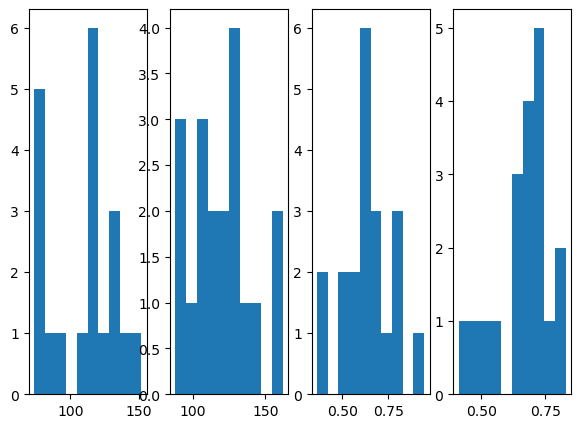

In [82]:
fig1, ax1 = plt.subplots(1, 4, figsize = (7, 5))
ax1[0].hist(ctrl_df['tempo'])
ax1[1].hist(positions_df['tempo'])
ax1[2].hist(ctrl_df['danceability'])
ax1[3].hist(positions_df['danceability'])
plt.show()

Based on the results of the histogram, the CTRL album has a faster tempo and is a more danceable album. This proved my hypothesesis since I thought that danceability and tempo would correlate with one atnother.

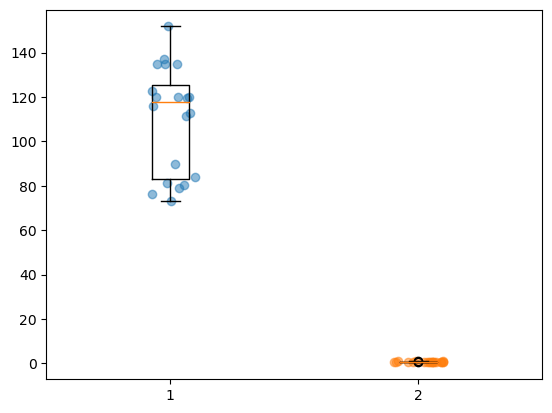

In [85]:
ctrl_tempo = ctrl_df['tempo']
ctrl_danceability = ctrl_df['danceability']

ctrltemp_xs = [1]*len(ctrl_tempo)
ctrldance_xs = [2]*len(ctrl_danceability)

ctrltemp_x_jitter = np.random.uniform(-0.10, .10, len(ctrltemp_xs))
ctrldance_x_jitter = np.random.uniform(-.10, .10, len(ctrldance_xs))

fig2, ax2 = plt.subplots()
ax2.boxplot(ctrl_tempo, positions = [1])
ax2.boxplot (ctrl_danceability, positions = [2])
ax2. scatter(ctrltemp_xs + ctrltemp_x_jitter, ctrl_tempo, alpha = .5)
ax2. scatter(ctrldance_xs + ctrldance_x_jitter, ctrl_danceability, alpha = .5)

plt.show()

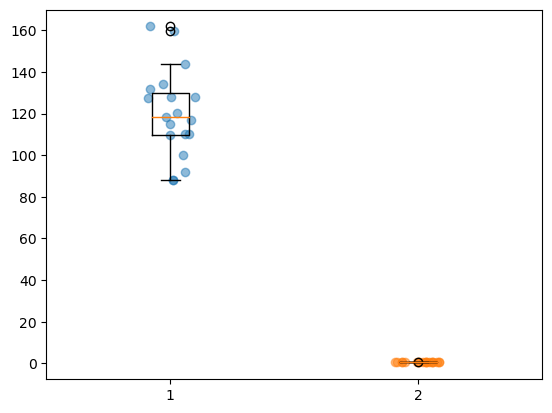

In [86]:
positions_tempo = positions_df['tempo']
positions_danceability = positions_df['danceability']

positionstemp_xs = [1]*len(positions_tempo)
positionsdance_xs = [2]*len(positions_danceability)

positionstemp_x_jitter = np.random.uniform(-0.10, .10, len(positionstemp_xs))
positionsdance_x_jitter = np.random.uniform(-.10, .10, len(positionsdance_xs))

fig2, ax2 = plt.subplots()
ax2.boxplot(positions_tempo, positions = [1])
ax2.boxplot (positions_danceability, positions = [2])
ax2. scatter(positionstemp_xs + positionstemp_x_jitter, positions_tempo, alpha = .5)
ax2. scatter(positionsdance_xs + positionsdance_x_jitter, positions_danceability, alpha = .5)

plt.show()

Based on the scatter plots, both albums had a range in tempo from around the 80s to avove the 140s. The danceability on both albums are low. i think this is a limitation of the data, bute to how cramped the second plot is compared to the first.

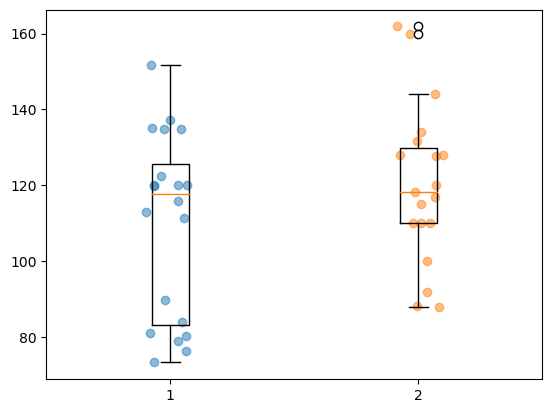

In [90]:
ctrl_tempo = ctrl_df['tempo']
positions_tempo = positions_df['tempo']

ctrltemp_xs = [1]*len(ctrl_tempo)
positionstemp_xs = [2]*len(positions_tempo)

ctrltemp_x_jitter = np.random.uniform(-0.10, .10, len(ctrltemp_xs))
positionstemp_x_jitter = np.random.uniform(-.10, .10, len(positionstemp_xs))

fig2, ax2 = plt.subplots()
ax2.boxplot(ctrl_tempo, positions = [1])
ax2.boxplot (positions_tempo, positions = [2])
ax2. scatter(ctrl_xs + ctrltemp_x_jitter, ctrl_tempo, alpha = .5)
ax2. scatter(positionstemp_xs + positionstemp_x_jitter, positions_tempo, alpha = .5)

plt.show()

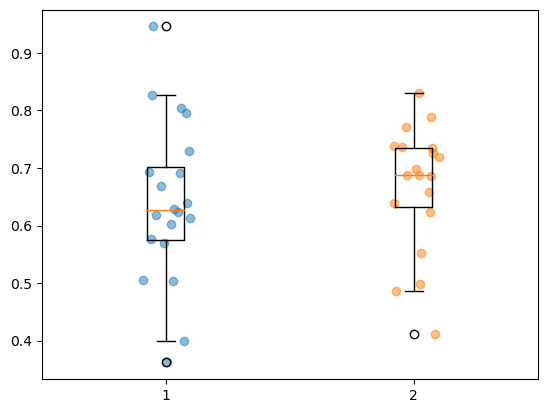

In [91]:
ctrl_dance = ctrl_df['danceability']
positions_dance = positions_df['danceability']

ctrldance_xs = [1]*len(ctrl_dance)
positionsdance_xs = [2]*len(positions_dance)

ctrldance_x_jitter = np.random.uniform(-0.10, .10, len(ctrldance_xs))
positionsdance_x_jitter = np.random.uniform(-.10, .10, len(positionsdance_xs))

fig2, ax2 = plt.subplots()
ax2.boxplot(ctrl_dance, positions = [1])
ax2.boxplot (positions_dance, positions = [2])
ax2. scatter(ctrl_xs + ctrldance_x_jitter, ctrl_dance, alpha = .5)
ax2. scatter(positionsdance_xs + positionsdance_x_jitter, positions_dance, alpha = .5)

plt.show()

In this next series, we can see that the positions album is slightly faster, and the danceability is slightly higher.